# Lab 2
# Roman Ahmad Zeia - 100812974 
# Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
waveform_database_generator_version_1 = fetch_ucirepo(id=107) 
  
X_waveform = waveform_database_generator_version_1.data.features 
y_waveform = waveform_database_generator_version_1.data.targets 

statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# clean up data and hot encode categorical data for credit dataset
X_credit = statlog_german_credit_data.data.features
categorical_credit_col = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7', 'Attribute9', 'Attribute10','Attribute12','Attribute14','Attribute15','Attribute17', 'Attribute19','Attribute20']
X_credit = pd.get_dummies(X_credit, columns= categorical_credit_col)


y_credit = statlog_german_credit_data.data.targets 
  


  


## Waveform data prediction model - Part 1

Holdout Results:
   Accuracy  Precision  F-measure
0     0.808   0.810038   0.808340
1     0.774   0.775399   0.774343
2     0.756   0.756716   0.756019
3     0.754   0.757919   0.754800
4     0.748   0.749553   0.748438

Average Holdout Metrics:
Accuracy     0.768000
Precision    0.769925
F-measure    0.768388
dtype: float64


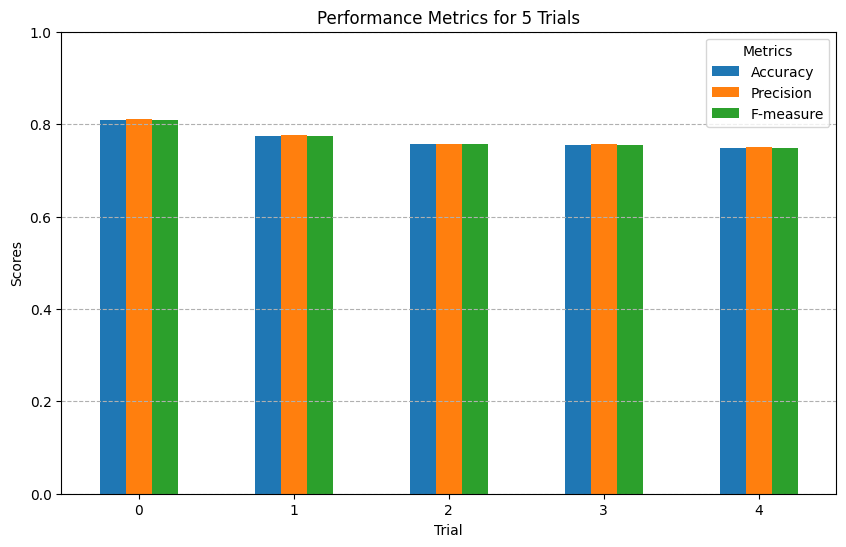

In [2]:
# Holdout

hold_out_results_waveform = []

for i in range(5): ## 5 trials
         X_train, X_test, y_train, y_test = train_test_split(X_waveform, y_waveform, test_size=0.1, random_state=None) ## creates a new split each time
         
         model = tree.DecisionTreeClassifier()
         model.fit(X_train, y_train)
         
         y_pred = model.predict(X_test)
         
         accuracy = accuracy_score(y_test, y_pred)
         precision = precision_score(y_test,y_pred, average='weighted')
         f_measure = f1_score(y_test, y_pred, average='weighted')
         
         hold_out_results_waveform.append((accuracy, precision, f_measure))
         
         
holdout_waveform_df = pd.DataFrame(hold_out_results_waveform, columns=['Accuracy', 'Precision', 'F-measure'])
holdout_means_waveform = holdout_waveform_df.mean()

print("Holdout Results:")
print(holdout_waveform_df)
print("\nAverage Holdout Metrics:")
print(holdout_means_waveform)


holdout_waveform_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 5 Trials')
plt.xlabel('Trial')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()


         

Cross-Validation Results:
   Accuracy  Precision  F-measure
0     0.770   0.787450   0.786073
1     0.784   0.785520   0.772297
2     0.758   0.760619   0.783857
3     0.762   0.751703   0.757780
4     0.762   0.772372   0.753617
5     0.744   0.749811   0.745078
6     0.734   0.736746   0.738491
7     0.764   0.737207   0.752584
8     0.754   0.759394   0.754170
9     0.760   0.782365   0.772725

Average Cross-Validation Metrics:
Accuracy     0.759200
Precision    0.762319
F-measure    0.761667
dtype: float64


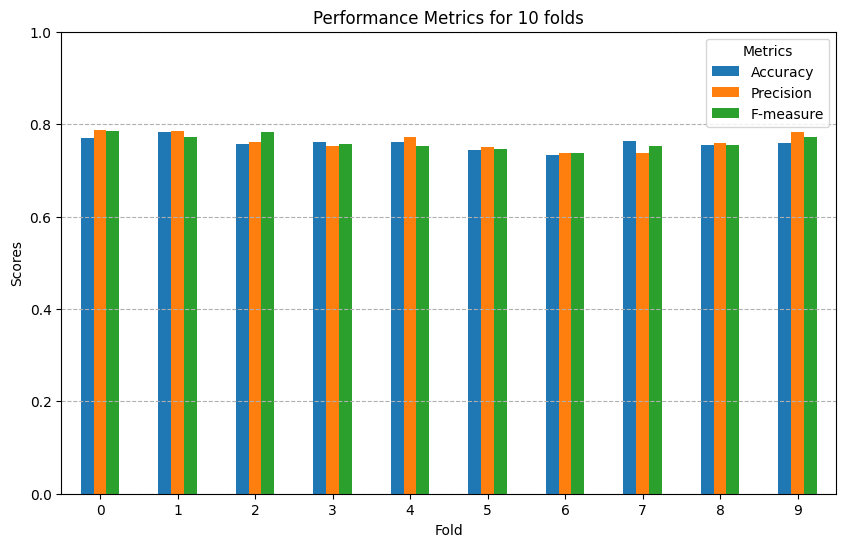

In [3]:
# Cross-validation

wv_model = tree.DecisionTreeClassifier()
wv_cv_accuracy = cross_val_score(model, X_waveform, y_waveform, cv=10, scoring='accuracy')
wv_cv_precision = cross_val_score(model, X_waveform, y_waveform, cv=10, scoring='precision_weighted')
wv_cv_f_measure = cross_val_score(model, X_waveform, y_waveform, cv=10, scoring='f1_weighted')

wv_cv_results = pd.DataFrame({
    'Accuracy': wv_cv_accuracy,
    'Precision': wv_cv_precision,
    'F-measure': wv_cv_f_measure
})

print("Cross-Validation Results:")
print(wv_cv_results)

wv_cv_means = wv_cv_results.mean()

print("\nAverage Cross-Validation Metrics:")
print(wv_cv_means)

wv_cv_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 10 folds')
plt.xlabel('Fold')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()





# Credit Data prediction model - Part 1

Holdout Results:
   Accuracy  Precision  F-measure
0      0.75   0.746933   0.748388
1      0.67   0.680257   0.674554
2      0.68   0.662500   0.668798
3      0.79   0.821071   0.801591
4      0.71   0.702738   0.705712

Average Holdout Metrics:
Accuracy     0.720000
Precision    0.722700
F-measure    0.719809
dtype: float64


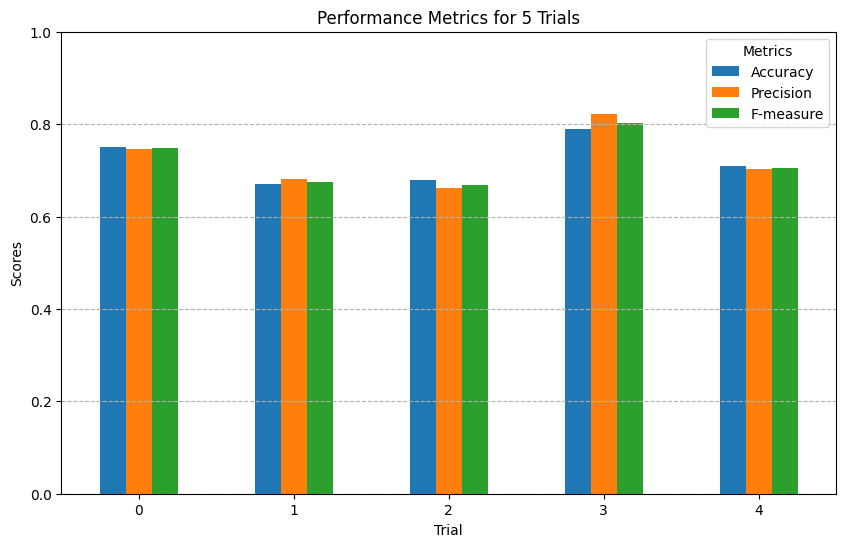

In [4]:
# Holdout

cr_hold_out_results = []

for i in range(5): ## 5 trials
         X_train, X_test, y_train, y_test = train_test_split(X_credit, y_credit, test_size=0.1, random_state=None) ## creates a new split each time
         
         model = tree.DecisionTreeClassifier()
         model.fit(X_train, y_train)
         
         y_pred = model.predict(X_test)
         
         accuracy = accuracy_score(y_test, y_pred)
         precision = precision_score(y_test,y_pred, average='weighted')
         f_measure = f1_score(y_test, y_pred, average='weighted')
         
         cr_hold_out_results.append((accuracy, precision, f_measure))
         
         
cr_holdout_df = pd.DataFrame(cr_hold_out_results, columns=['Accuracy', 'Precision', 'F-measure'])
cr_holdout_means = cr_holdout_df.mean()

print("Holdout Results:")
print(cr_holdout_df)
print("\nAverage Holdout Metrics:")
print(cr_holdout_means)

cr_holdout_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 5 Trials')
plt.xlabel('Trial')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()

Cross-Validation Results:
   Accuracy  Precision  F-measure
0      0.72   0.731832   0.747415
1      0.64   0.673165   0.696182
2      0.76   0.767897   0.762132
3      0.69   0.689189   0.682842
4      0.63   0.628352   0.648304
5      0.71   0.695935   0.650849
6      0.66   0.689334   0.662190
7      0.69   0.718750   0.715783
8      0.67   0.640789   0.632143
9      0.69   0.633333   0.681254

Average Cross-Validation Metrics:
Accuracy     0.686000
Precision    0.686858
F-measure    0.687910
dtype: float64


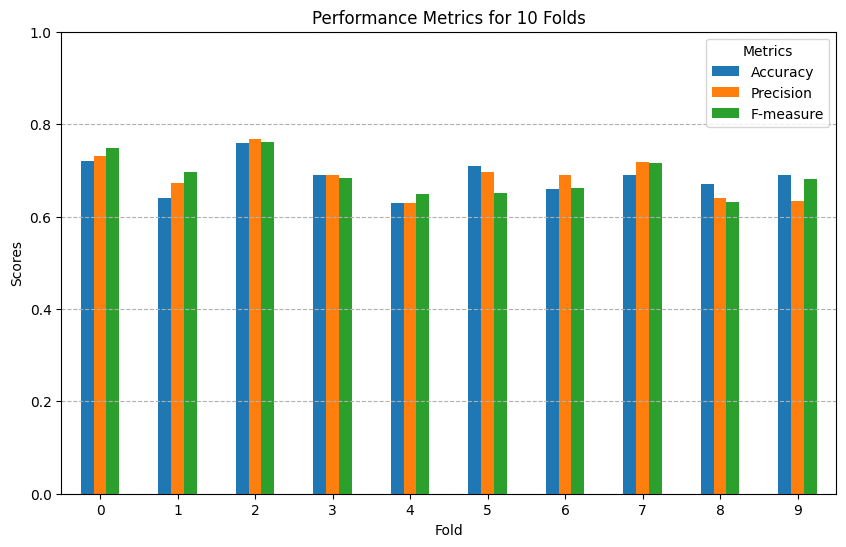

In [5]:
# Cross-validation

cr_model = tree.DecisionTreeClassifier()
cr_cv_accuracy = cross_val_score(model, X_credit, y_credit, cv=10, scoring='accuracy')
cr_cv_precision = cross_val_score(model, X_credit, y_credit, cv=10, scoring='precision_weighted')
cr_cv_f_measure = cross_val_score(model, X_credit, y_credit, cv=10, scoring='f1_weighted')

cr_cv_results = pd.DataFrame({
    'Accuracy': cr_cv_accuracy,
    'Precision': cr_cv_precision,
    'F-measure': cr_cv_f_measure
})

print("Cross-Validation Results:")
print(cr_cv_results)

cr_cv_means = cr_cv_results.mean()

print("\nAverage Cross-Validation Metrics:")
print(cr_cv_means)

cr_cv_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 10 Folds')
plt.xlabel('Fold')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()

# Part 2

# Waveform Data - entropy

Holdout Results:
   Accuracy  Precision  F-measure
0     0.758   0.758303   0.757986
1     0.768   0.776947   0.768468
2     0.762   0.762886   0.762092
3     0.760   0.760236   0.760024
4     0.782   0.782177   0.781616

Average Holdout Metrics:
Accuracy     0.766000
Precision    0.768110
F-measure    0.766037
dtype: float64


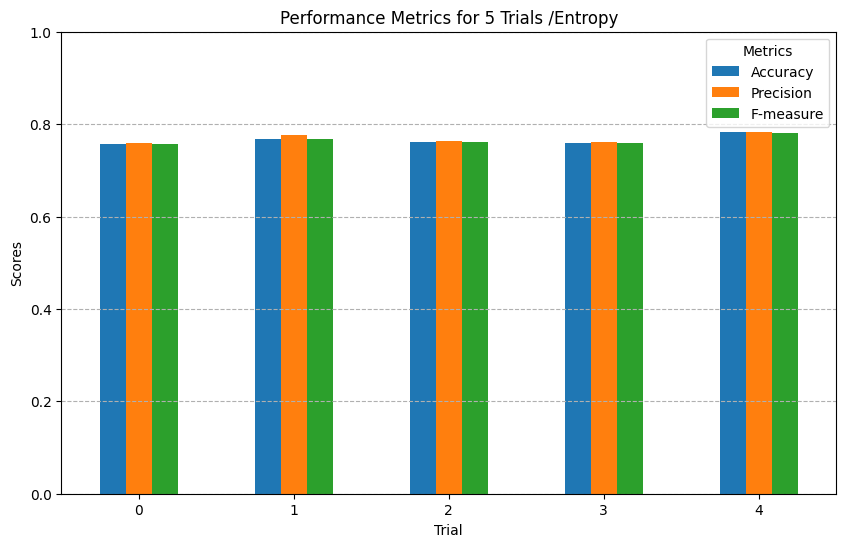

In [6]:
# Holdout - entropy - waveform data

wve_hold_out_results = []

for i in range(5): ## 5 trials
         X_train, X_test, y_train, y_test = train_test_split(X_waveform, y_waveform, test_size=0.1, random_state=None) ## creates a new split each time
         
         model = tree.DecisionTreeClassifier(criterion="entropy")
         model.fit(X_train, y_train)
         
         y_pred = model.predict(X_test)
         
         accuracy = accuracy_score(y_test, y_pred)
         precision = precision_score(y_test,y_pred, average='weighted')
         f_measure = f1_score(y_test, y_pred, average='weighted')
         
         wve_hold_out_results.append((accuracy, precision, f_measure))
         
         
wve_holdout_df = pd.DataFrame(wve_hold_out_results, columns=['Accuracy', 'Precision', 'F-measure'])
wve_holdout_means = wve_holdout_df.mean()

print("Holdout Results:")
print(wve_holdout_df)
print("\nAverage Holdout Metrics:")
print(wve_holdout_means)

wve_holdout_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 5 Trials /Entropy')
plt.xlabel('Trial')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()

Cross-Validation Results:
   Accuracy  Precision  F-measure
0     0.798   0.784103   0.785994
1     0.740   0.742215   0.728084
2     0.758   0.763301   0.769702
3     0.770   0.768525   0.756052
4     0.774   0.764300   0.771948
5     0.724   0.719269   0.728354
6     0.756   0.776756   0.756257
7     0.748   0.755815   0.758784
8     0.748   0.752369   0.744140
9     0.744   0.741435   0.741917

Average Cross-Validation Metrics:
Accuracy     0.756000
Precision    0.756809
F-measure    0.754123
dtype: float64


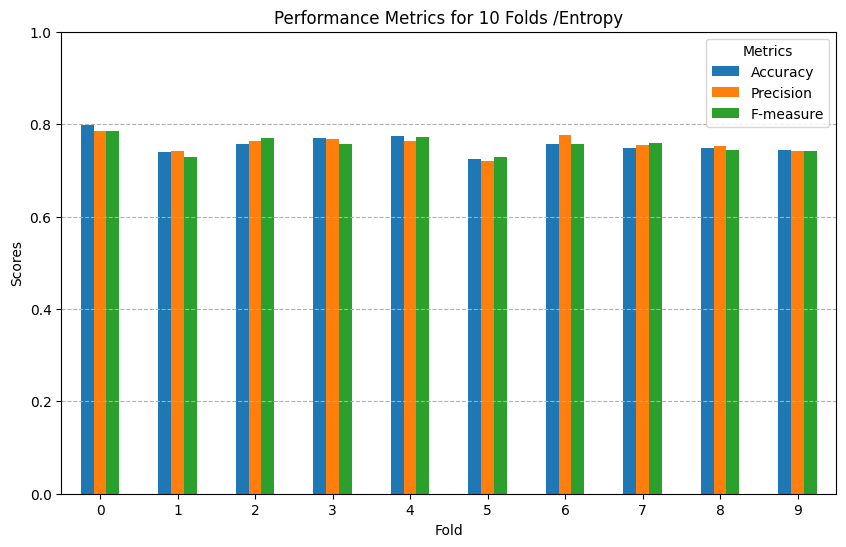

In [7]:
# Cross-validation - entropy - waveform data

wve_model = tree.DecisionTreeClassifier(criterion="entropy")
wve_cv_accuracy = cross_val_score(model, X_waveform, y_waveform, cv=10, scoring='accuracy')
wve_cv_precision = cross_val_score(model, X_waveform, y_waveform, cv=10, scoring='precision_weighted')
wve_cv_f_measure = cross_val_score(model, X_waveform, y_waveform, cv=10, scoring='f1_weighted')

wve_cv_results = pd.DataFrame({
    'Accuracy': wve_cv_accuracy,
    'Precision': wve_cv_precision,
    'F-measure': wve_cv_f_measure
})

print("Cross-Validation Results:")
print(wve_cv_results)

wve_cv_means = wve_cv_results.mean()

print("\nAverage Cross-Validation Metrics:")
print(wve_cv_means)

wve_cv_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 10 Folds /Entropy')
plt.xlabel('Fold')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()

# Credit Data - Entropy

Holdout Results:
   Accuracy  Precision  F-measure
0      0.58   0.588801   0.583500
1      0.67   0.658339   0.660786
2      0.70   0.691982   0.695724
3      0.67   0.697389   0.680625
4      0.74   0.752279   0.744952

Average Holdout Metrics:
Accuracy     0.672000
Precision    0.677758
F-measure    0.673117
dtype: float64


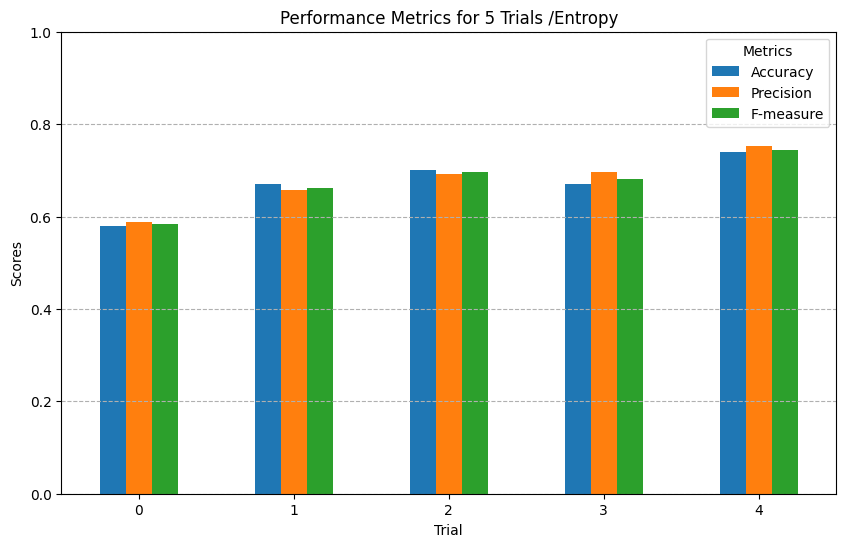

In [8]:
# Holdout - entropy

cre_hold_out_results = []

for i in range(5): ## 5 trials
         X_train, X_test, y_train, y_test = train_test_split(X_credit, y_credit, test_size=0.1, random_state=None) ## creates a new split each time
         
         model = tree.DecisionTreeClassifier(criterion="entropy")
         model.fit(X_train, y_train)
         
         y_pred = model.predict(X_test)
         
         accuracy = accuracy_score(y_test, y_pred)
         precision = precision_score(y_test,y_pred, average='weighted')
         f_measure = f1_score(y_test, y_pred, average='weighted')
         
         cre_hold_out_results.append((accuracy, precision, f_measure))
         
         
cre_holdout_df = pd.DataFrame(cre_hold_out_results, columns=['Accuracy', 'Precision', 'F-measure'])
cre_holdout_means = cre_holdout_df.mean()

print("Holdout Results:")
print(cre_holdout_df)
print("\nAverage Holdout Metrics:")
print(cre_holdout_means)

cre_holdout_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 5 Trials /Entropy')
plt.xlabel('Trial')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()

Cross-Validation Results:
   Accuracy  Precision  F-measure
0      0.63   0.725055   0.685294
1      0.77   0.780000   0.762132
2      0.73   0.689189   0.710198
3      0.66   0.680000   0.713730
4      0.63   0.613698   0.616124
5      0.64   0.718667   0.660690
6      0.68   0.706621   0.687381
7      0.76   0.764231   0.772298
8      0.68   0.666877   0.708571
9      0.62   0.634266   0.644979

Average Cross-Validation Metrics:
Accuracy     0.68000
Precision    0.69786
F-measure    0.69614
dtype: float64


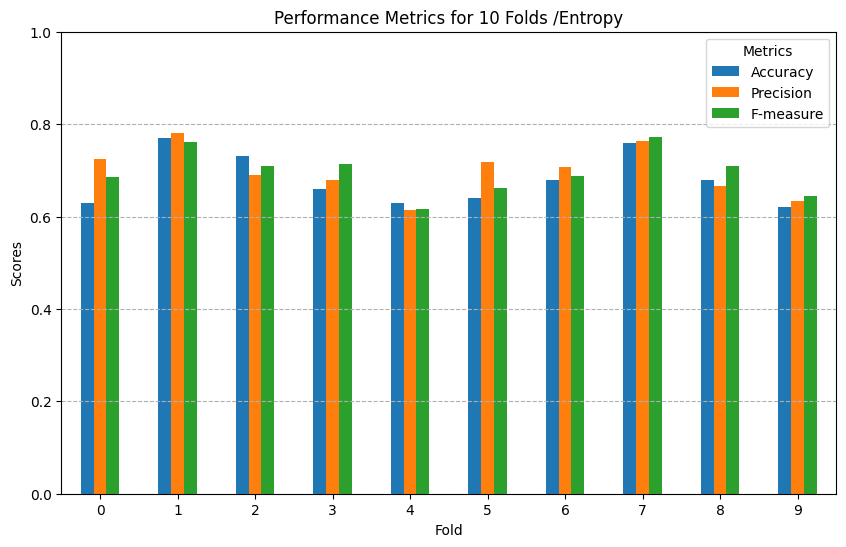

In [9]:
cre_model = tree.DecisionTreeClassifier(criterion="entropy")
cre_cv_accuracy = cross_val_score(model, X_credit, y_credit, cv=10, scoring='accuracy')
cre_cv_precision = cross_val_score(model, X_credit, y_credit, cv=10, scoring='precision_weighted')
cre_cv_f_measure = cross_val_score(model, X_credit, y_credit, cv=10, scoring='f1_weighted')

cre_cv_results = pd.DataFrame({
    'Accuracy': cre_cv_accuracy,
    'Precision': cre_cv_precision,
    'F-measure': cre_cv_f_measure
})

print("Cross-Validation Results:")
print(cre_cv_results)

cre_cv_means = cre_cv_results.mean()

print("\nAverage Cross-Validation Metrics:")
print(cre_cv_means)

cre_cv_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for 10 Folds /Entropy')
plt.xlabel('Fold')
plt.ylabel('Scores')
plt.xticks(rotation=0) 
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.show()

## Comparing final Accuracy of cross-validation with Entropy and not.

In [10]:
wvcvvalue_entropy = wve_cv_means['Accuracy']
wvcvvalue = wv_cv_means['Accuracy']

print(f'Final accuracy of cross-validation for Waveform data set without Entropy for impurty measure: {wvcvvalue}')
print(f'Final accuracy of cross-validation for Waveform data set with Entropy for impurty measure: {wvcvvalue_entropy}')

print("\n")
crcvvalue_entropy = cre_cv_means['Accuracy']
crcvvalue = cr_cv_means['Accuracy']

print(f'Final accuracy of cross-validation for Credit data set without Entropy for impurty measure: {crcvvalue}')
print(f'Final accuracy of cross-validation for Credit data set with Entropy for impurty measure: {crcvvalue_entropy}')


Final accuracy of cross-validation for Waveform data set without Entropy for impurty measure: 0.7591999999999999
Final accuracy of cross-validation for Waveform data set with Entropy for impurty measure: 0.756


Final accuracy of cross-validation for Credit data set without Entropy for impurty measure: 0.6859999999999999
Final accuracy of cross-validation for Credit data set with Entropy for impurty measure: 0.6799999999999999


# Part 3

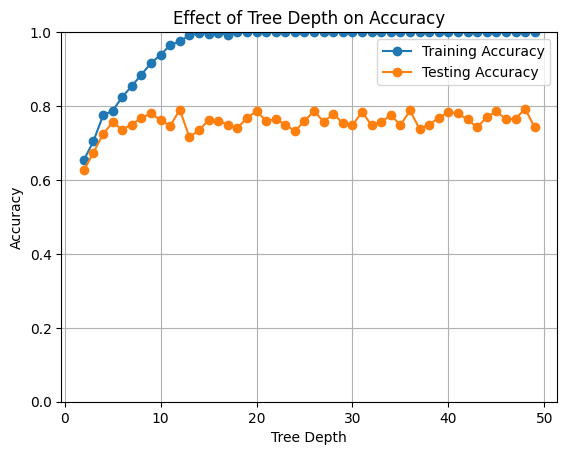

In [11]:
depth_range = range(2,50)
train_accuracies = []
test_accuracies = []

for i in depth_range:
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_waveform, y_waveform, test_size=0.1, random_state=None)
    
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    
    model.fit(X_train, Y_train)
    
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure()
plt.plot(depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_range, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Effect of Tree Depth on Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

## Observations

### Based on the graph above we can abserve that as we predict with a higher depth value the accuracy gets higher and higher